In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Rose.csv')
df.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [4]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [5]:
# Adding the time stamp to the data frame
df['Time_Stamp'] = pd.DataFrame(date)
df.head()

,YearMonth,Rose,Time_Stamp
0,1980-01,112.0,1980-01-31
1,1980-02,118.0,1980-02-29
2,1980-03,129.0,1980-03-31
3,1980-04,99.0,1980-04-30
4,1980-05,116.0,1980-05-31


In [6]:
df= df.drop('YearMonth',axis=1)

In [7]:
df.head()

,Rose,Time_Stamp
0,112.0,1980-01-31
1,118.0,1980-02-29
2,129.0,1980-03-31
3,99.0,1980-04-30
4,116.0,1980-05-31


In [8]:
df.set_index('Time_Stamp',inplace=True)
df.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [9]:
df.tail()

,Rose
Time_Stamp,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


In [10]:
df.isnull().sum()

Rose    2
dtype: int64

In [11]:
# Missing values in Time Series in python
df['Rose'].interpolate(method='linear', inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    187 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [13]:
df.tail()

,Rose
Time_Stamp,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


In [14]:
df.isnull().sum()

Rose    0
dtype: int64

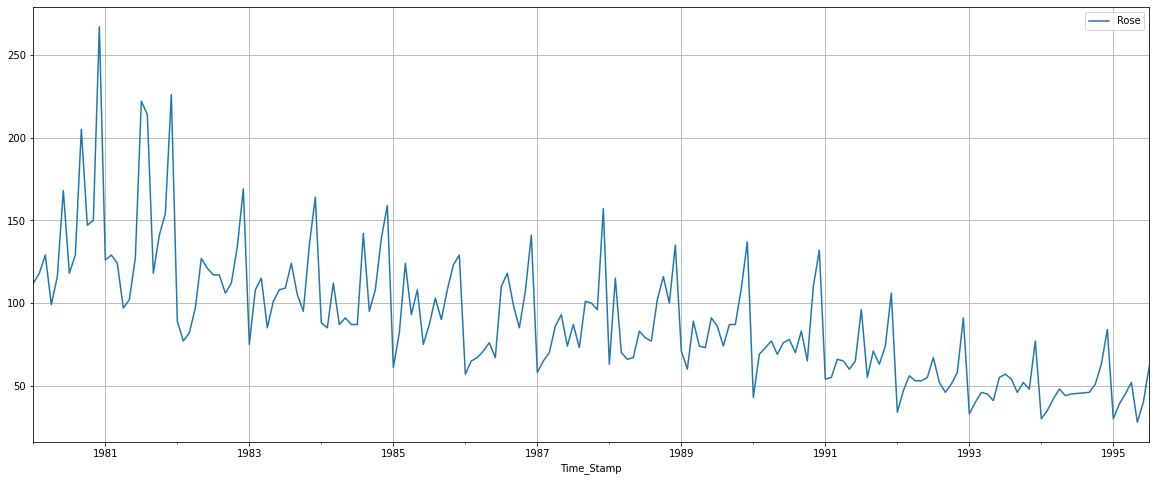

In [15]:
df.plot(figsize=(20,8))
plt.grid();

In [16]:
round(df.describe(),3)

,Rose
count,187.000
mean,89.914
std,39.238
min,28.000
25%,62.500
50%,85.000
75%,111.000
max,267.000


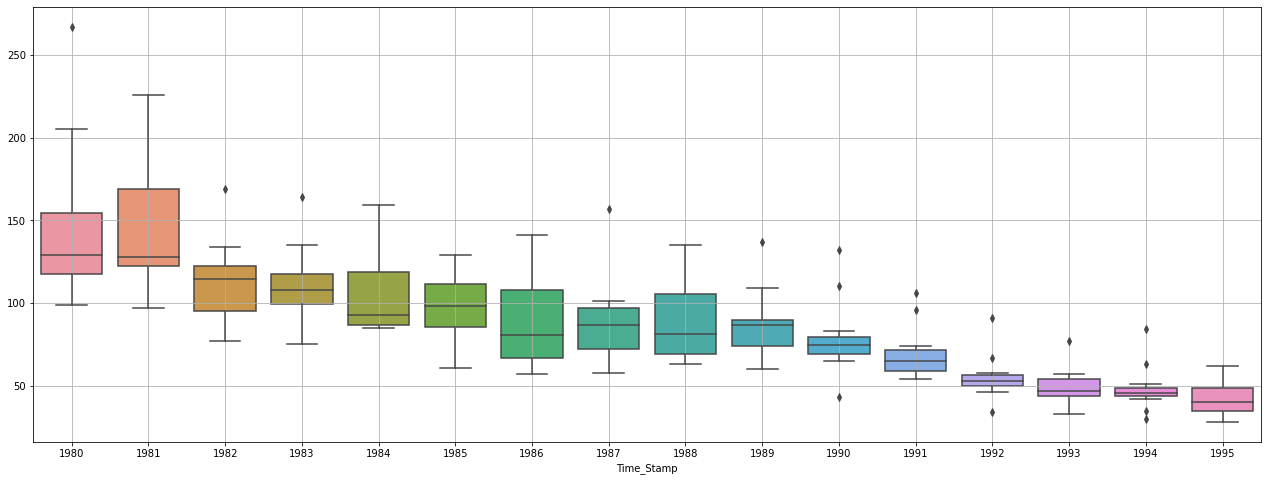

In [17]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.grid();

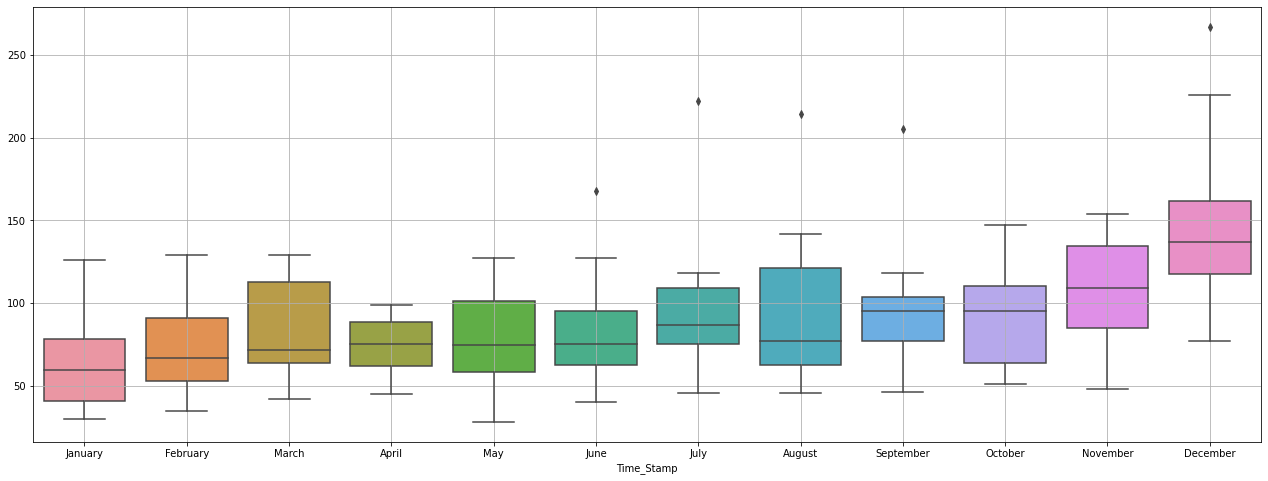

In [18]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.grid();

In [19]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years

Time_Stamp,April,August,December,February,January,July,June,March,May,November,October,September
Time_Stamp,,,,,,,,,,,,
1980,99.0,129.000000,267.0,118.0,112.0,118.000000,168.0,129.0,116.0,150.0,147.0,205.0
1981,97.0,214.000000,226.0,129.0,126.0,222.000000,127.0,124.0,102.0,154.0,141.0,118.0
1982,97.0,117.000000,169.0,77.0,89.0,117.000000,121.0,82.0,127.0,134.0,112.0,106.0
1983,85.0,124.000000,164.0,108.0,75.0,109.000000,108.0,115.0,101.0,135.0,95.0,105.0
1984,87.0,142.000000,159.0,85.0,88.0,87.000000,87.0,112.0,91.0,139.0,108.0,95.0
1985,93.0,103.000000,129.0,82.0,61.0,87.000000,75.0,124.0,108.0,123.0,108.0,90.0
1986,71.0,118.000000,141.0,65.0,57.0,110.000000,67.0,67.0,76.0,107.0,85.0,99.0
1987,86.0,73.000000,157.0,65.0,58.0,87.000000,74.0,70.0,93.0,96.0,100.0,101.0
1988,66.0,77.000000,135.0,115.0,63.0,79.000000,83.0,70.0,67.0,100.0,116.0,102.0


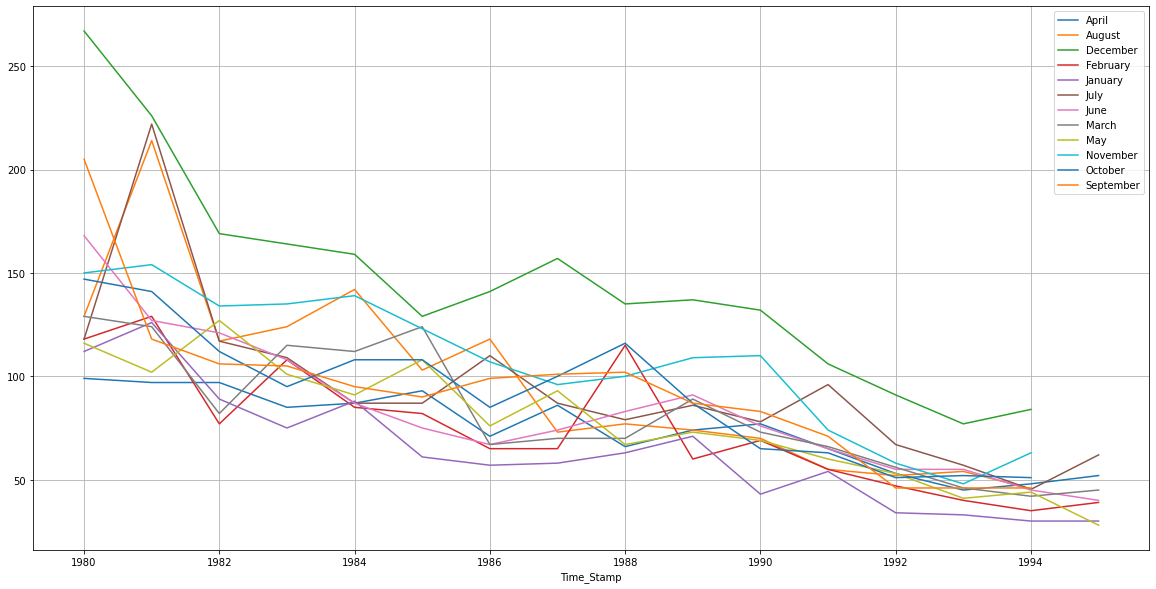

In [20]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

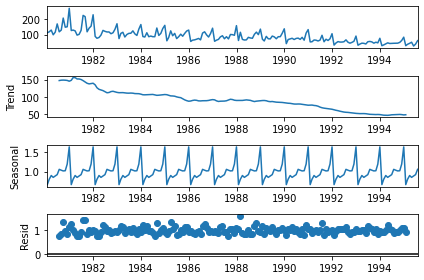

In [21]:
from    statsmodels.tsa.seasonal import   seasonal_decompose
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

In [22]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.670111
1980-02-29    0.806163
1980-03-31    0.901164
1980-04-30    0.854024
1980-05-31    0.889415
1980-06-30    0.923985
1980-07-31    1.058038
1980-08-31    1.035881
1980-09-30    1.017648
1980-10-31    1.022573
1980-11-30    1.192349
1980-12-31    1.628646
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.758258
1980-08-31    0.840720
1980-09-30    1.357674
1980-10-31    0.970771
1980-11-30    0.853378
1980-12-31    1.129646
Name: resid, dtype:

In [23]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [24]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [25]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
              Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0 

Last few rows of Training Data 
              Rose
Time_Stamp       
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0 

First few rows of Test Data 
             Rose
Time_Stamp      
1991-01-31  54.0
1991-02-28  55.0
1991-03-31  66.0
1991-04-30  65.0
1991-05-31  60.0 

Last few rows of Test Data 
             Rose
Time_Stamp      
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0 



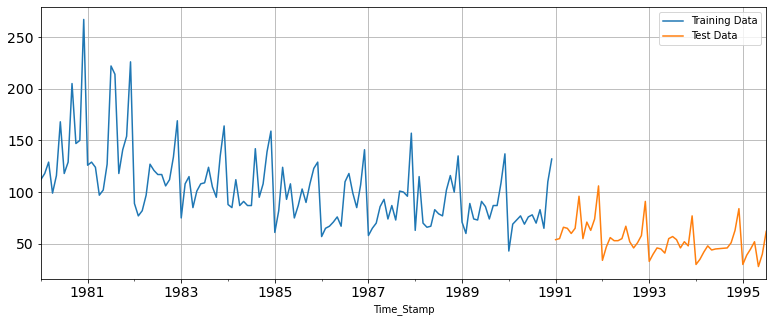

In [27]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [28]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


In [29]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [30]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
Time_Stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
Time_Stamp            
1991-01-31  54.0    43
1991-02-28  55.0    44
1991-03-31  66.0    45
1991-04-30  65.0    46
1991-05-31  60.0    47 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-31  45.0    93
1995-04-30  52.0    94
1995-05-31  28.0    95
1995-06-30  40.0    96
1995-07-31  62.0    97 



In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

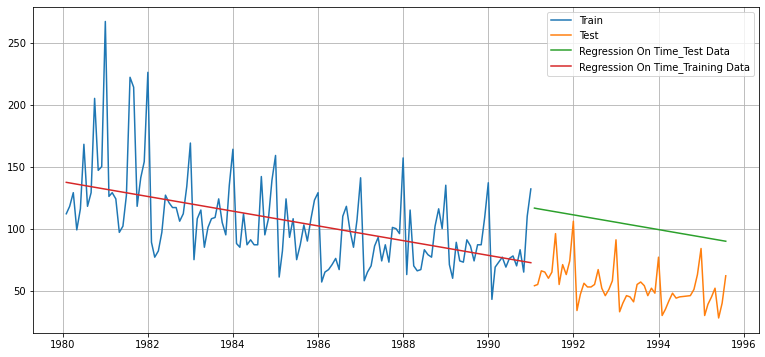

In [33]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Training Data')
plt.legend(loc='best')
plt.grid();

In [98]:
from sklearn import metrics
## Mean Absolute Percentage - Function Definition

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [36]:
## Training Data - RMSE and MAPE

rmse_model1_train = metrics.mean_squared_error(train['Rose'],train_predictions_model1,squared=False)
mape_model1_train = MAPE(train['Rose'],train_predictions_model1)
print("For RegressionOnTime forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_train, mape_model1_train))

For RegressionOnTime forecast on the Training Data,  RMSE is 30.718 MAPE is 21.22


In [39]:
## Test Data - RMSE and MAPE

rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
mape_model1_test = MAPE(test['Rose'],test_predictions_model1)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_test, mape_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 51.433 MAPE is 91.64


In [40]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test],'Test MAPE': [mape_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,51.433312,91.64


# Model 2: Naive Approach:  𝑦̂ 𝑡+1=𝑦𝑡 


In [41]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [42]:
## Let us get the last value (or the most recent value) of the training set.

NaiveModel_train['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_train['naive'].head()

Time_Stamp
1980-01-31    132.0
1980-02-29    132.0
1980-03-31    132.0
1980-04-30    132.0
1980-05-31    132.0
Name: naive, dtype: float64

In [43]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

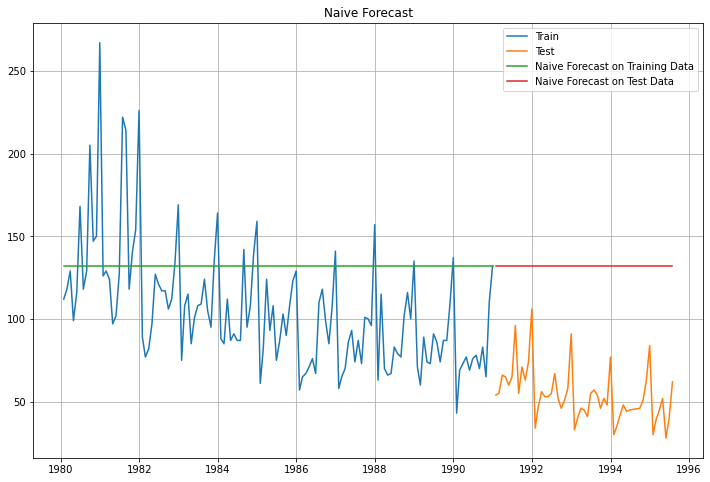

In [44]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

# Model Evaluation

In [45]:
## Training Data - RMSE and MAPE

rmse_model2_train = metrics.mean_squared_error(train['Rose'],NaiveModel_train['naive'],squared=False)
mape_model2_train = MAPE(train['Rose'],NaiveModel_train['naive'])
print("For Naive Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_train, mape_model2_train))

For Naive Model forecast on the Training Data,  RMSE is 45.064 MAPE is 36.38


In [46]:
## Test Data - RMSE and MAPE

rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
mape_model2_test = MAPE(test['Rose'],NaiveModel_test['naive'])
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_test, mape_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.719 MAPE is 145.10


In [47]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test],'Test MAPE': [mape_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,51.433312,91.64
NaiveModel,79.718773,145.10


# Method 3: Simple Average

In [48]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [49]:
## Let us get the last value (or the most recent value) of the training set.

SimpleAverage_train['mean_forecast'] = train['Rose'].mean()
SimpleAverage_train.head()

,Rose,mean_forecast
Time_Stamp,,
1980-01-31,112.0,104.939394
1980-02-29,118.0,104.939394
1980-03-31,129.0,104.939394
1980-04-30,99.0,104.939394
1980-05-31,116.0,104.939394


In [50]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
Time_Stamp,,
1991-01-31,54.0,104.939394
1991-02-28,55.0,104.939394
1991-03-31,66.0,104.939394
1991-04-30,65.0,104.939394
1991-05-31,60.0,104.939394


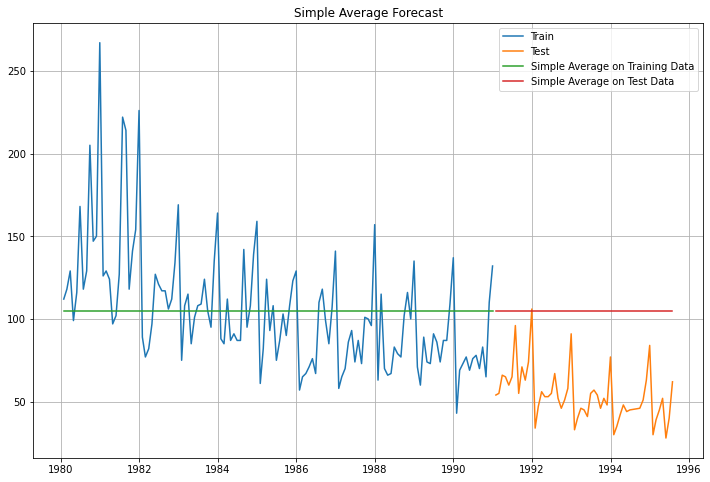

In [51]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

# Model Evaluation

In [52]:
## Training Data - RMSE and MAPE

rmse_model3_train = metrics.mean_squared_error(train['Rose'],SimpleAverage_train['mean_forecast'],squared=False)
mape_model3_train = MAPE(train['Rose'],SimpleAverage_train['mean_forecast'])
print("For Simple Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_train, mape_model3_train))

For Simple Average Model forecast on the Training Data,  RMSE is 36.034 MAPE is 25.39


In [53]:
## Test Data - RMSE and MAPE

rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
mape_model3_test = MAPE(test['Rose'],SimpleAverage_test['mean_forecast'])
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_test, mape_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.461 MAPE is 94.93


In [54]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test],'Test MAPE': [mape_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,51.433312,91.64
NaiveModel,79.718773,145.10
SimpleAverageModel,53.460570,94.93


# Method 4: Moving Average(MA)

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.
For Moving Average, we are going to average over the entire data.

In [55]:
MovingAverage = df.copy()
MovingAverage.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [56]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,112.0,NaN,NaN,NaN,NaN
1980-02-29,118.0,115.0,NaN,NaN,NaN
1980-03-31,129.0,123.5,NaN,NaN,NaN
1980-04-30,99.0,114.0,114.5,NaN,NaN
1980-05-31,116.0,107.5,115.5,NaN,NaN


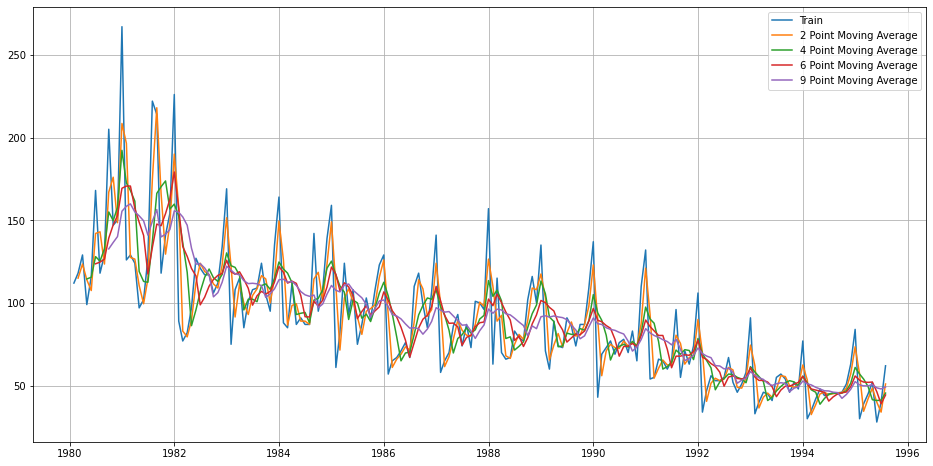

In [57]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [69]:
#Creating train and test set 
#trailing_MovingAverage_train=train 
#trailing_MovingAverage_test=test
trailing_MovingAverage_train = MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test = MovingAverage[MovingAverage.index.year >= 1991]

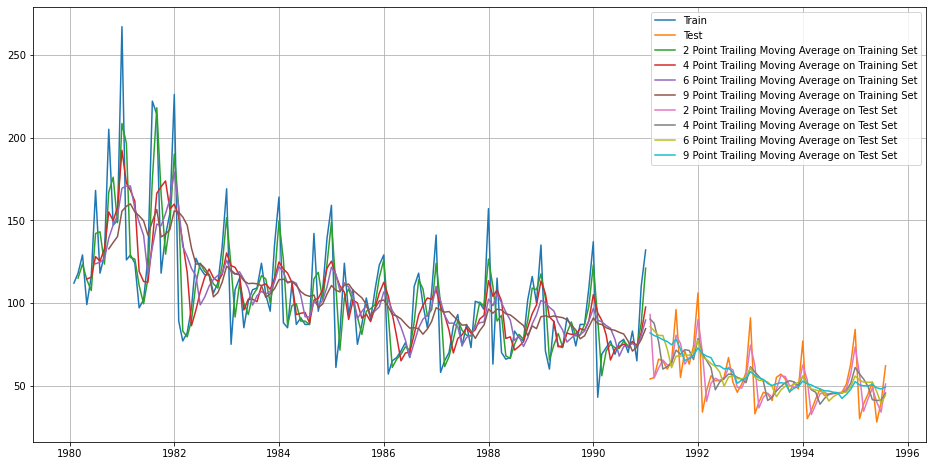

In [70]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

# Model Evaluation

In [73]:
## Test Data - RMSE and MAPE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
mape_model4_test_2 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_2, mape_model4_test_2))

## Test Data - RMSE and MAPE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
mape_model4_test_4 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_4, mape_model4_test_4))

## Test Data - RMSE and MAPE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
mape_model4_test_6 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_6, mape_model4_test_6))

## Test Data - RMSE and MAPE --> 9 point Trailing MA

#rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
#mape_model4_test_9 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_9'])
#print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_9, mape_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.529 MAPE is 13.54
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.451 MAPE is 19.49
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.566 MAPE is 20.82


In [74]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4,rmse_model4_test_6,]
                            ,'Test MAPE': [mape_model4_test_2,mape_model4_test_4,mape_model4_test_6]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,51.433312,91.64
NaiveModel,79.718773,145.10
SimpleAverageModel,53.460570,94.93
2pointTrailingMovingAverage,11.529278,13.54
4pointTrailingMovingAverage,14.451403,19.49
6pointTrailingMovingAverage,14.566327,20.82


# plot all the models and compare the Time Series plots.¶

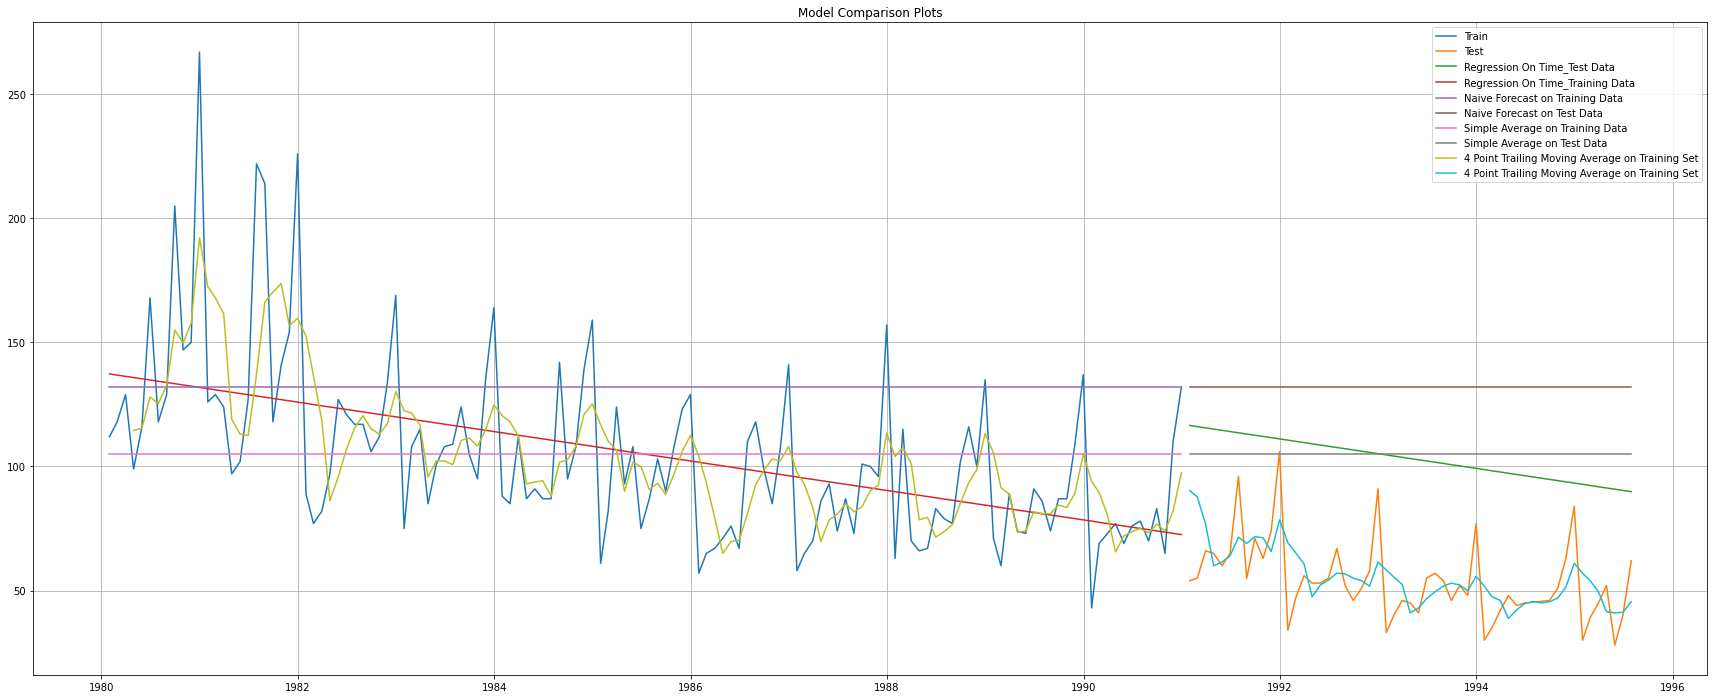

In [75]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

# Method 5: Simple Exponential Smoothing

In [76]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [77]:
SES_train = train.copy()
SES_test = test.copy()

In [78]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [79]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [80]:
model_SES_autofit.params

{'smoothing_level': 0.09874985002628338,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 134.38726392126804,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [81]:
SES_train['predict'] = model_SES_autofit.fittedvalues
SES_train.head()

,Rose,predict
Time_Stamp,,
1980-01-31,112.0,134.387264
1980-02-29,118.0,132.176525
1980-03-31,129.0,130.776595
1980-04-30,99.0,130.601157
1980-05-31,116.0,127.480547


In [116]:
len(SES_test)

55

In [117]:
SES_test['predict'] = model_SES_autofit.forecast(steps=55)
SES_test.head()

,Rose,predict,"(predict, 0.3)"
Time_Stamp,,,
1991-01-31,54.0,87.104998,98.669021
1991-02-28,55.0,87.104998,98.669021
1991-03-31,66.0,87.104998,98.669021
1991-04-30,65.0,87.104998,98.669021
1991-05-31,60.0,87.104998,98.669021


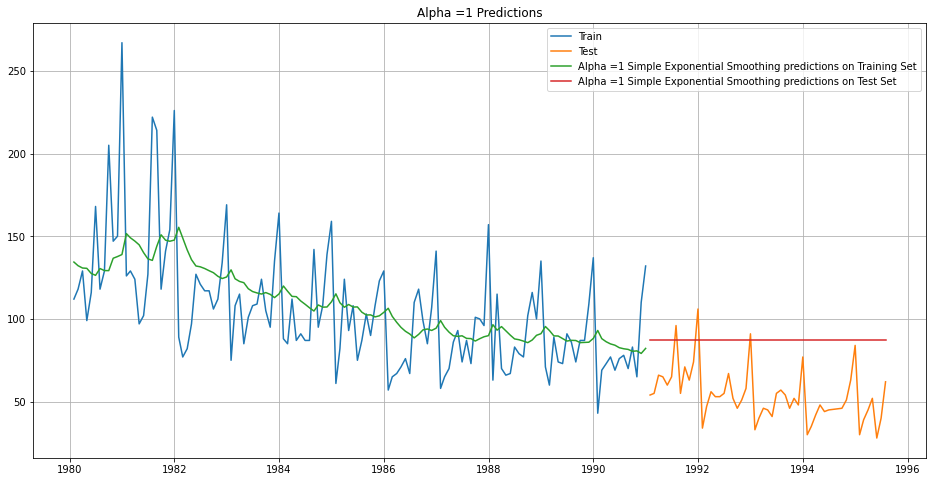

In [118]:
# Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_train['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =1 Predictions');

# Model Evaluation for  𝛼  = 1 : Simple Exponential Smoothing

In [119]:
## Training Data

rmse_model5_train_1 = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict'],squared=False)
mape_model5_train_1 = MAPE(SES_train['Rose'],SES_train['predict'])
print("For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_train_1, mape_model5_train_1))

For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 31.501 MAPE is 22.73


In [120]:
import pandas as pd

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [121]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
mape_model5_test_1 = MAPE(SES_test['Rose'],SES_test['predict'])
print("For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_test_1, mape_model5_test_1))

For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 36.796 MAPE is 63.88


In [124]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1],'Test MAPE': [mape_model5_test_1]}
                           ,index=['Alpha=1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,51.433312,91.64
NaiveModel,79.718773,145.10
SimpleAverageModel,53.460570,94.93
2pointTrailingMovingAverage,11.529278,13.54
4pointTrailingMovingAverage,14.451403,19.49
6pointTrailingMovingAverage,14.566327,20.82
"Alpha=1,SimpleExponentialSmoothing",31.500869,22.73
"Alpha=1,SimpleExponentialSmoothing",36.796241,63.88


In [125]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_6

,Alpha Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE


In [130]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=True,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)
    mape_model5_train_i = MAPE(SES_train['Rose'],SES_train['predict',i])
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    mape_model5_test_i = MAPE(SES_test['Rose'],SES_test['predict',i])
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Train MAPE': mape_model5_train_i,'Test RMSE':rmse_model5_test_i
                                      ,'Test MAPE':mape_model5_test_i}, ignore_index=True)

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= u

In [131]:
resultsDf_6

,Alpha Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.3,32.448833,22.31,47.504821,83.71
1,0.4,33.028400,22.51,53.767406,95.50
2,0.5,33.680192,22.69,59.641786,106.81
3,0.6,34.439946,22.89,64.971288,117.04
4,0.7,35.322683,23.09,69.698162,126.07
5,0.8,36.334371,23.42,73.773992,133.83
6,0.9,37.482735,23.93,77.139276,140.22
7,0.3,32.448833,22.31,47.504821,83.71
8,0.4,33.028400,22.51,53.767406,95.50
9,0.5,33.680192,22.69,59.641786,106.81


In [132]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=True,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)
    mape_model5_train_i = MAPE(SES_train['Rose'],SES_train['predict',i])
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    mape_model5_test_i = MAPE(SES_test['Rose'],SES_test['predict',i])
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Train MAPE': mape_model5_train_i,'Test RMSE':rmse_model5_test_i
                                      ,'Test MAPE':mape_model5_test_i}, ignore_index=True)

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= u

In [133]:
resultsDf_6

,Alpha Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.3,32.448833,22.31,47.504821,83.71
1,0.4,33.028400,22.51,53.767406,95.50
2,0.5,33.680192,22.69,59.641786,106.81
3,0.6,34.439946,22.89,64.971288,117.04
4,0.7,35.322683,23.09,69.698162,126.07
5,0.8,36.334371,23.42,73.773992,133.83
6,0.9,37.482735,23.93,77.139276,140.22
7,0.3,32.448833,22.31,47.504821,83.71
8,0.4,33.028400,22.51,53.767406,95.50
9,0.5,33.680192,22.69,59.641786,106.81


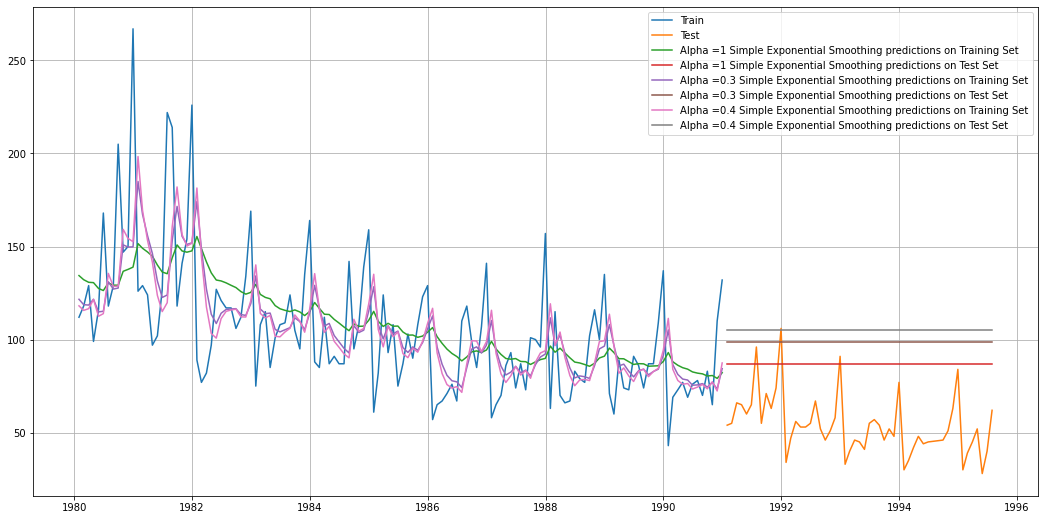

In [134]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_train['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_train['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_train['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [135]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6['Test RMSE'][0],resultsDf_6['Test RMSE'][1]]
                            ,'Test MAPE': [resultsDf_6['Test MAPE'][0],resultsDf_6['Test MAPE'][1]]}
                           ,index=['Alpha=0.3,SimpleExponentialSmoothing','Alpha=0.4,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,51.433312,91.64
NaiveModel,79.718773,145.10
SimpleAverageModel,53.460570,94.93
2pointTrailingMovingAverage,11.529278,13.54
4pointTrailingMovingAverage,14.451403,19.49
6pointTrailingMovingAverage,14.566327,20.82
"Alpha=1,SimpleExponentialSmoothing",31.500869,22.73
"Alpha=1,SimpleExponentialSmoothing",36.796241,63.88
"Alpha=0.3,SimpleExponentialSmoothing",47.504821,83.71
"Alpha=0.4,SimpleExponentialSmoothing",53.767406,95.50


# Method 6: Double Exponential Smoothing (Holt's Model)

In [136]:
DES_train = train.copy()
DES_test = test.copy()

In [137]:
model_DES = Holt(DES_train['Rose'])

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [138]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE


In [139]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)
        mape_model6_train = MAPE(DES_train['Rose'],DES_train['predict',i,j])
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        mape_model6_test = MAPE(DES_test['Rose'],DES_test['predict',i,j])
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                      ,'Train MAPE': mape_model6_train,'Test RMSE':rmse_model6_test
                                      ,'Test MAPE':mape_model6_test}, ignore_index=True)

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= u

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= u

In [140]:
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.3,0.3,35.928003,25.51,265.567594,442.50
1,0.3,0.4,37.393239,26.53,358.750942,593.91
2,0.3,0.5,38.888325,27.54,451.810230,745.22
3,0.3,0.6,40.280670,28.63,536.954148,883.91
4,0.3,0.7,41.403518,29.56,601.616351,989.57
...,...,...,...,...,...,...
59,1.0,0.6,51.828562,34.61,801.680218,1323.85
60,1.0,0.7,54.493671,36.36,841.892573,1388.87
61,1.0,0.8,57.362069,38.19,853.965537,1408.39
62,1.0,0.9,60.470112,40.12,834.710935,1377.26


In [141]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.3,0.3,35.928003,25.51,265.567594,442.50
8,0.4,0.3,36.733732,25.57,339.306534,565.42
1,0.3,0.4,37.393239,26.53,358.750942,593.91
16,0.5,0.3,37.424080,25.45,394.272629,657.17
24,0.6,0.3,38.343309,25.58,439.296033,732.29


In [142]:
resultsDf_7.sort_values(by=['Test MAPE']).head()

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.3,0.3,35.928003,25.51,265.567594,442.50
8,0.4,0.3,36.733732,25.57,339.306534,565.42
1,0.3,0.4,37.393239,26.53,358.750942,593.91
16,0.5,0.3,37.424080,25.45,394.272629,657.17
9,0.4,0.4,37.982228,26.45,441.965558,732.26


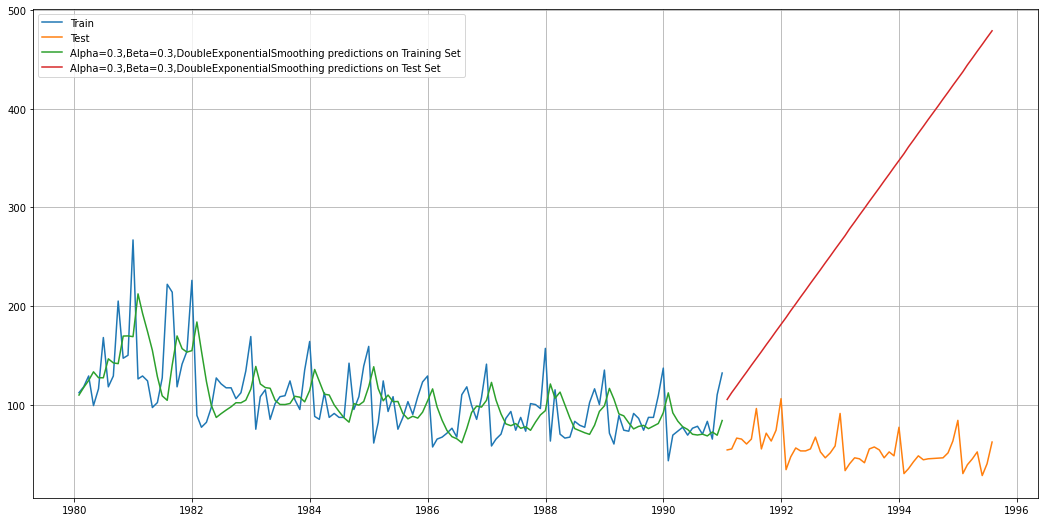

In [143]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_train['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [144]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7['Test RMSE'][0]],'Test MAPE':[resultsDf_7['Test MAPE'][0]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,51.433312,91.64
NaiveModel,79.718773,145.10
SimpleAverageModel,53.460570,94.93
2pointTrailingMovingAverage,11.529278,13.54
4pointTrailingMovingAverage,14.451403,19.49
6pointTrailingMovingAverage,14.566327,20.82
"Alpha=1,SimpleExponentialSmoothing",31.500869,22.73
"Alpha=1,SimpleExponentialSmoothing",36.796241,63.88
"Alpha=0.3,SimpleExponentialSmoothing",47.504821,83.71
"Alpha=0.4,SimpleExponentialSmoothing",53.767406,95.50


# Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

In [145]:
TES_train = train.copy()
TES_test = test.copy()

In [146]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='M')

In [147]:
model_TES_autofit = model_TES.fit()

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


The above fit of the model is by the best parameters that Python thinks for the model. It uses a brute force method to choose the parameters

In [148]:
model_TES_autofit.params

{'smoothing_level': 0.10609630896598816,
 'smoothing_slope': 0.048438506611339596,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 76.65565108239777,
 'initial_slope': 0.0,
 'initial_seasons': array([1.47550257, 1.65927135, 1.80572621, 1.58888812, 1.77822689,
        1.92604353, 2.11649443, 2.25135182, 2.11690561, 2.08112817,
        2.4092726 , 3.30448096]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [149]:
## Prediction on the training data

TES_train['auto_predict'] = model_TES_autofit.fittedvalues
TES_train.head()

,Rose,auto_predict
Time_Stamp,,
1980-01-31,112.0,113.105610
1980-02-29,118.0,127.054225
1980-03-31,129.0,137.165611
1980-04-30,99.0,119.844363
1980-05-31,116.0,131.432564


In [154]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=55)
TES_test.head()

,Rose,auto_predict
Time_Stamp,,
1991-01-31,54.0,56.674339
1991-02-28,55.0,63.471277
1991-03-31,66.0,68.788790
1991-04-30,65.0,60.277828
1991-05-31,60.0,67.180379


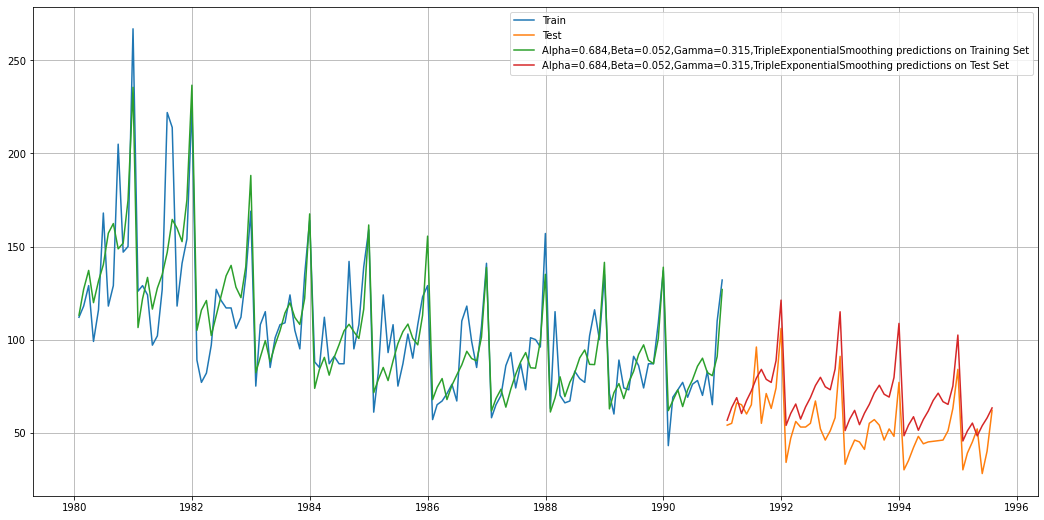

In [155]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_train['auto_predict'], label='Alpha=0.684,Beta=0.052,Gamma=0.315,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.684,Beta=0.052,Gamma=0.315,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [156]:
## Training Data

rmse_model6_train_1 = metrics.mean_squared_error(TES_train['Rose'],TES_train['auto_predict'],squared=False)
mape_model6_train_1 = MAPE(TES_train['Rose'],TES_train['auto_predict'])
print("For Alpha: 0.6842105260095289,Beta: 0.052631578950616174 and Gamma: 0.31578947337900887, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model6_train_1, mape_model6_train_1))

For Alpha: 0.6842105260095289,Beta: 0.052631578950616174 and Gamma: 0.31578947337900887, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is 18.579 MAPE is 13.21


In [157]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
mape_model6_test_1 = MAPE(TES_test['Rose'],TES_test['auto_predict'])
print("For Alpha: 0.6842105260095289,Beta: 0.052631578950616174 and Gamma: 0.31578947337900887, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model6_test_1, mape_model6_test_1))

For Alpha: 0.6842105260095289,Beta: 0.052631578950616174 and Gamma: 0.31578947337900887, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 17.369 MAPE is 28.88


In [158]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1],'Test MAPE':[mape_model6_test_1]}
                           ,index=['Alpha=0.684,Beta=0.052,Gamma=0.315,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,51.433312,91.64
NaiveModel,79.718773,145.10
SimpleAverageModel,53.460570,94.93
2pointTrailingMovingAverage,11.529278,13.54
4pointTrailingMovingAverage,14.451403,19.49
6pointTrailingMovingAverage,14.566327,20.82
"Alpha=1,SimpleExponentialSmoothing",31.500869,22.73
"Alpha=1,SimpleExponentialSmoothing",36.796241,63.88
"Alpha=0.3,SimpleExponentialSmoothing",47.504821,83.71
"Alpha=0.4,SimpleExponentialSmoothing",53.767406,95.50


In [159]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE


In [161]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=True,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            mape_model8_train = MAPE(TES_train['Rose'],TES_train['predict',i,j,k])
        
            rmse_model8_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            mape_model8_test = MAPE(TES_test['Rose'],TES_test['predict',i,j,k])
        
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Train RMSE':rmse_model8_train
                                      ,'Train MAPE': mape_model8_train,'Test RMSE':rmse_model8_test
                                      ,'Test MAPE':mape_model8_test}, ignore_index=True)

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\User

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\User

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\User

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\User

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\User

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\User

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\User

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\User

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\User

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\User

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\User

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\User

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\User

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\User

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\User

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\User

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\User

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\User

C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\manuraj.ls\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\User

In [162]:
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.3,0.3,0.3,23.015713,16.25,20.819120,33.98
1,0.3,0.3,0.4,24.209084,16.78,10.169630,13.67
2,0.3,0.3,0.5,25.730329,17.50,31.662948,47.12
3,0.3,0.3,0.6,27.549930,18.44,73.313608,114.08
4,0.3,0.3,0.7,30.568635,19.41,122.472557,191.16
...,...,...,...,...,...,...,...
507,1.0,1.0,0.6,28358.458519,3085.88,9603.635095,7812.80
508,1.0,1.0,0.7,30724.126331,4617.55,23029.955361,11836.06
509,1.0,1.0,0.8,1218.755446,493.75,9626.710854,8581.01
510,1.0,1.0,0.9,14150.253251,2303.41,9691.905402,7916.19


In [163]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
1,0.3,0.3,0.4,24.209084,16.78,10.169630,13.67
8,0.3,0.4,0.3,28.111886,17.08,10.945435,15.08
69,0.4,0.3,0.8,32.601491,19.30,12.615607,15.72
16,0.3,0.5,0.3,29.087520,17.50,14.414604,21.25
131,0.5,0.3,0.6,32.144773,18.75,16.720720,24.57


In [164]:
resultsDf_8_2.sort_values(by=['Test MAPE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
1,0.3,0.3,0.4,24.209084,16.78,10.169630,13.67
8,0.3,0.4,0.3,28.111886,17.08,10.945435,15.08
69,0.4,0.3,0.8,32.601491,19.30,12.615607,15.72
16,0.3,0.5,0.3,29.087520,17.50,14.414604,21.25
131,0.5,0.3,0.6,32.144773,18.75,16.720720,24.57


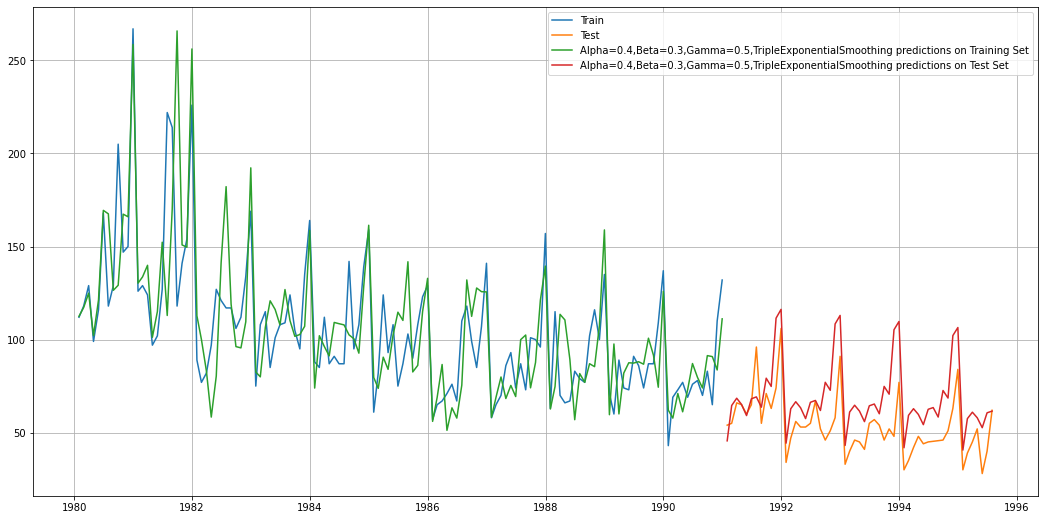

In [165]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_train['predict', 0.4, 0.3, 0.5], label='Alpha=0.4,Beta=0.3,Gamma=0.5,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['predict', 0.4, 0.3, 0.5], label='Alpha=0.4,Beta=0.3,Gamma=0.5,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [166]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2['Test RMSE'][66]],'Test MAPE':[resultsDf_8_2['Test MAPE'][66]]}
                           ,index=['Alpha=0.4,Beta=0.3,Gamma=0.5,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,51.433312,91.64
NaiveModel,79.718773,145.10
SimpleAverageModel,53.460570,94.93
2pointTrailingMovingAverage,11.529278,13.54
4pointTrailingMovingAverage,14.451403,19.49
6pointTrailingMovingAverage,14.566327,20.82
"Alpha=1,SimpleExponentialSmoothing",31.500869,22.73
"Alpha=1,SimpleExponentialSmoothing",36.796241,63.88
"Alpha=0.3,SimpleExponentialSmoothing",47.504821,83.71
"Alpha=0.4,SimpleExponentialSmoothing",53.767406,95.50


In [167]:
print('Sorted by RMSE values on the Test Data:','\n',resultsDf.sort_values(by=['Test RMSE']),'\n','\n')
print('Sorted by MAPE values on the Test Data:','\n',resultsDf.sort_values(by=['Test MAPE']))

Sorted by RMSE values on the Test Data: 
                                                      Test RMSE  Test MAPE
2pointTrailingMovingAverage                          11.529278      13.54
4pointTrailingMovingAverage                          14.451403      19.49
6pointTrailingMovingAverage                          14.566327      20.82
Alpha=0.684,Beta=0.052,Gamma=0.315,TripleExpone...   17.369489      28.88
Alpha=0.4,Beta=0.3,Gamma=0.5,TripleExponentialS...   20.062739      30.35
Alpha=1,SimpleExponentialSmoothing                   31.500869      22.73
Alpha=1,SimpleExponentialSmoothing                   36.796241      63.88
Alpha=0.3,SimpleExponentialSmoothing                 47.504821      83.71
RegressionOnTime                                     51.433312      91.64
SimpleAverageModel                                   53.460570      94.93
Alpha=0.4,SimpleExponentialSmoothing                 53.767406      95.50
NaiveModel                                           79.718773     145

We see that the best model is the Triple Exponential Smoothing with additive seasonality with the parameters  𝛼  = 0.3,  𝛽  = 0.3 and  𝛾  = 0.4.

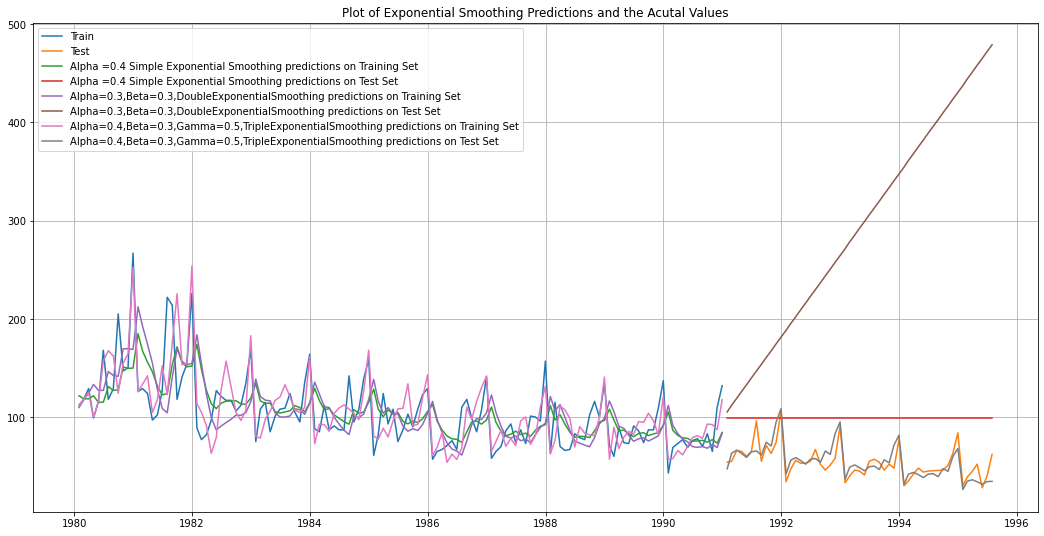

In [168]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(SES_train['predict', 0.3], label='Alpha =0.4 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.3], label='Alpha =0.4 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_train['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_train['predict', 0.3, 0.3, 0.4], label='Alpha=0.4,Beta=0.3,Gamma=0.5,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['predict', 0.3, 0.3, 0.4], label='Alpha=0.4,Beta=0.3,Gamma=0.5,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');